In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")

In [3]:
evds=evdsAPI('dsIC3fiGlu')


In [4]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd

,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.3263
1,02-02-2006,1.3241
2,03-02-2006,1.3277
3,06-02-2006,1.3257
4,07-02-2006,1.3296
...,...,...
4620,18-10-2023,27.9221
4621,19-10-2023,28.0163
4622,20-10-2023,28.0153
4623,23-10-2023,28.0218


In [5]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

# Sonucu görüntüle
usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-06-30,23.106042
2023-07-31,26.470338
2023-08-31,26.999127


In [6]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84
210,2023-8,1614.31


In [7]:

enf=pd.DataFrame(enf)
enf.columns=["Tarih","TÜFE"]


In [8]:

inflation=enf
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84
210,2023-8,1614.31


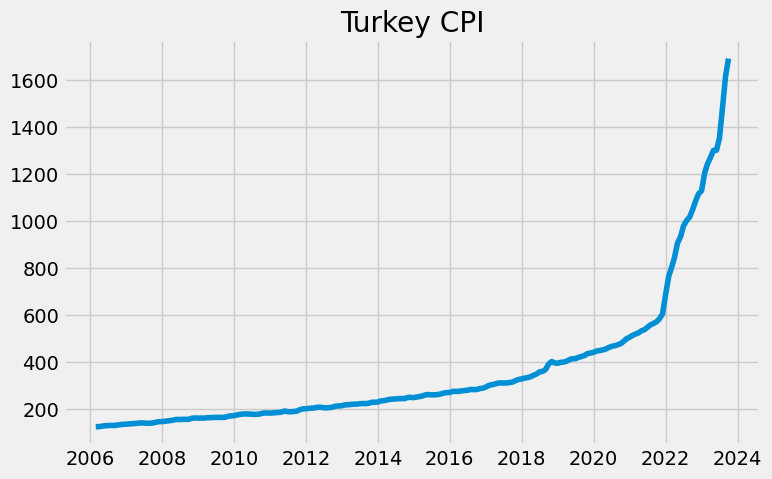

In [9]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure(figsize=(8,5))
plt.title("Turkey CPI")
plt.plot(df)
plt.show()


In [10]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-06-30,23.106042
2023-07-31,26.470338
2023-08-31,26.999127


In [11]:
dates= pd.date_range('2006-02-01','2023-11-01' , freq='1M')           
df6=df6.set_index(dates)
df6


,USD/TL
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-06-30,23.106042
2023-07-31,26.470338
2023-08-31,26.999127
2023-09-30,26.989448


In [12]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
del money["Tarih"]
money['Tarih'] = pd.to_datetime(money['YEARWEEK'] + '-1', format='%Y-%W-%w')
money = money.groupby(money['Tarih'].dt.to_period('M'))['TP_PR_ARZ13'].mean()
money=pd.DataFrame(money)
money.columns=["Para Arzi"]
money=money/1e+08
money=money.set_index(df6.index)
money

,Para Arzi
2006-02-28,2.424295
2006-03-31,2.473023
2006-04-30,2.514337
2006-05-31,2.648480
2006-06-30,2.794302
...,...
2023-06-30,104.034758
2023-07-31,113.228626
2023-08-31,119.111278
2023-09-30,122.425258


In [13]:
m3=evds.get_data(["TP.PR.ARZ22"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del m3["Tarih"]
m3.columns=["M3 Para Arzi"]
m3=m3/1e+08
m3=m3.set_index(df6.index)
m3

,M3 Para Arzi
2006-02-28,2.663248
2006-03-31,2.731552
2006-04-30,2.767716
2006-05-31,3.025340
2006-06-30,3.038097
...,...
2023-06-30,111.098957
2023-07-31,117.729650
2023-08-31,123.434020
2023-09-30,126.660411


In [14]:

issizlik=evds.get_data(["TP.TIG08"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del issizlik["Tarih"]
issizlik.columns=["İşsizlik"]
issizlik=issizlik.dropna(axis=0)
issizlik=issizlik.set_index(pd.date_range(start="2014-01-30",end="2023-09-29",freq="1M"))
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2023-04-30,10.0
2023-05-31,9.5
2023-06-30,9.6
2023-07-31,9.4


In [15]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,01-02-2006,65.64
1,02-02-2006,63.49
2,03-02-2006,62.54
3,06-02-2006,63.32
4,07-02-2006,61.64
...,...,...
4614,10-10-2023,90.70
4615,11-10-2023,87.58
4616,12-10-2023,88.40
4617,13-10-2023,94.33


In [16]:
brent['Tarih'] = pd.to_datetime(brent['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
brent.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
brent = brent.resample('M').mean()

# Sonucu görüntüle

brent

,TP_BRENTPETROL_EUBP
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-06-30,74.839091
2023-07-31,80.108095
2023-08-31,86.147727


In [17]:
df14=pd.DataFrame()
dates=pd.date_range('2006-02-28','2023-11-29' , freq='1M')

df14["Brent"]=brent["TP_BRENTPETROL_EUBP"]
df14["TIME"]=dates
df14['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df14 = df14.set_index(['TIME'])
df14

,Brent
TIME,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-06-30,74.839091
2023-07-31,80.108095
2023-08-31,86.147727


In [18]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,1.381847e+08
1,2006-3,1.481222e+08
2,2006-4,1.527510e+08
3,2006-5,1.664881e+08
4,2006-6,1.740395e+08
...,...,...
208,2023-6,9.564604e+09
209,2023-7,9.846895e+09
210,2023-8,9.923806e+09
211,2023-9,1.025829e+10


In [19]:
dates=pd.date_range('2006-02-01','2023-11-01' , freq='1M')
kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
kredi

,Tarih,Kredi
0,2006-2,1.381847
1,2006-3,1.481222
2,2006-4,1.527510
3,2006-5,1.664881
4,2006-6,1.740395
...,...,...
208,2023-6,95.646045
209,2023-7,98.468952
210,2023-8,99.238055
211,2023-9,102.582870


In [20]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=dates
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3=df3.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))
df3

,Kredi
2006-02-28,1.381847
2006-03-31,1.481222
2006-04-30,1.527510
2006-05-31,1.664881
2006-06-30,1.740395
...,...
2023-06-30,95.646045
2023-07-31,98.468952
2023-08-31,99.238055
2023-09-30,102.582870


In [21]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.columns=["Tarih","Faiz"]
pfaiz.iloc[:11,1]=17.5
pfaiz.iloc[11:23,1]=21.5
pfaiz.iloc[23:35,1]=19.25
pfaiz.iloc[35:47,1]=10.25
pfaiz.iloc[47:59,1]=8
pfaiz["Faiz"]=pfaiz["Faiz"].astype(float)
pfaiz.iloc[212,1]=35
pfaiz



,Tarih,Faiz
0,2006-2,17.50
1,2006-3,17.50
2,2006-4,17.50
3,2006-5,17.50
4,2006-6,17.50
...,...,...
208,2023-6,12.84
209,2023-7,17.50
210,2023-8,23.50
211,2023-9,31.00


In [22]:
dates=pd.date_range('2006-02-28','2023-11-29' , freq='1M')
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz

,Politika Faizi
TIME,
2006-02-28,17.50
2006-03-31,17.50
2006-04-30,17.50
2006-05-31,17.50
2006-06-30,17.50
...,...
2023-06-30,12.84
2023-07-31,17.50
2023-08-31,23.50


In [23]:
kfaiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kfaiz.columns=["Tarih","Kredi Faizi"]
kfaiz=kfaiz.set_index(kfaiz["Tarih"])
del kfaiz["Tarih"]
kfaiz=kfaiz.astype(float)
kfaiz=kfaiz.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))
kfaiz

,Kredi Faizi
2006-02-28,17.2975
2006-03-31,17.0080
2006-04-30,16.2075
2006-05-31,16.3000
2006-06-30,19.6700
...,...
2023-06-30,38.5600
2023-07-31,45.8250
2023-08-31,45.7650
2023-09-30,56.2980


In [24]:
perakende=pd.read_excel("C:/Users/Bora/Downloads/perakende satis hacim endeksi ve degisim oranlari (sabit fiyatlarla) (2015=100).xls")
perakende1=perakende.iloc[5:,2].dropna(axis=0).astype(float)
perakende1=pd.DataFrame(perakende1)
perakende1.columns=["Arındırılmamış"]


perakende1["Takvimden Arındırılmış"]=perakende.iloc[5:169,4].astype(float)
perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]=perakende.iloc[5:169,7].astype(float)
perakende1=perakende1.set_index(pd.date_range(start="2010-01-01",end="2023-09-01",freq="1M"))
perakende1

,Arındırılmamış,Takvimden Arındırılmış,Mevsimsellikten ve Takvimden Arındırılmış
2010-01-31,57.403841,57.747949,67.560585
2010-02-28,57.317027,57.179176,68.192727
2010-03-31,67.904361,67.034985,69.536955
2010-04-30,67.048510,66.458455,70.175625
2010-05-31,70.327428,70.614865,70.604236
...,...,...,...
2023-04-30,165.916139,169.886079,174.404111
2023-05-31,181.176925,179.726145,180.185729
2023-06-30,180.070938,186.141640,180.131292
2023-07-31,191.355951,193.831190,185.482059


In [25]:
motorin=pd.read_excel("C:/Users/Bora/Downloads/motorin.xlsx")
motorin.columns=["Tarih","Motorin"]
motorin=motorin.set_index(pd.date_range(start="2003-01-01",end="2023-10-01",freq="1M"))
del motorin["Tarih"]
motorin=motorin.astype(float)
motorin

,Motorin
2003-01-31,1.366645
2003-02-28,1.457199
2003-03-31,1.529555
2003-04-30,1.439813
2003-05-31,1.404363
...,...
2023-05-31,18.920000
2023-06-30,22.100000
2023-07-31,29.480000
2023-08-31,37.370000


In [26]:
sanayi=evds.get_data(["TP.SANAYREV4.Y1"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
sanayi=sanayi.set_index(pd.date_range(start="2006-02-01",end="2023-09-01",freq="1M"))
del sanayi["Tarih"]
sanayi.columns=["Sanayi"]
sanayi

,Sanayi
2006-02-28,55.819129
2006-03-31,65.933232
2006-04-30,62.501869
2006-05-31,66.499838
2006-06-30,67.519860
...,...
2023-04-30,129.873251
2023-05-31,149.379361
2023-06-30,137.891848
2023-07-31,145.483816


In [27]:
mfaiz=evds.get_data(["TP.TRY.MT02"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
mfaiz=mfaiz.set_index(pd.date_range(start="2006-02-01",end="2023-11-01",freq="1M"))
del mfaiz["Tarih"]
mfaiz.columns=["Mevduat Faizi"]
mfaiz

,Mevduat Faizi
2006-02-28,15.7600
2006-03-31,15.3300
2006-04-30,15.1750
2006-05-31,14.9250
2006-06-30,15.5840
...,...
2023-06-30,39.5920
2023-07-31,33.1250
2023-08-31,29.4125
2023-09-30,41.6560


In [28]:
from datetime import date
enf_belirsizlik=evds.get_data(["TP.BEK.S01.E.S"],startdate="30-06-2013",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2013-06-30",end="2023-11-29",freq="1M"))
del enf_belirsizlik["Tarih"]
enf_belirsizlik.columns=["Enflasyon Belirsizliği"]
enf_belirsizlik

,Enflasyon Belirsizliği
2013-06-30,0.62
2013-07-31,0.74
2013-08-31,0.74
2013-09-30,0.77
2013-10-31,0.65
...,...
2023-06-30,7.55
2023-07-31,7.70
2023-08-31,6.81
2023-09-30,7.30


In [30]:
borc=evds.get_data(["TP.KB.A09"],startdate="28-02-2010",enddate="30-10-2023",frequency=5)
del borc["Tarih"]
borc=borc.set_index(pd.date_range(start="2010-02-28",end="2023-10-29",freq="1M"))
borc.columns=["Borç"]
borc

,Borç
2010-02-28,3.394344e+08
2010-03-31,3.406784e+08
2010-04-30,3.431629e+08
2010-05-31,3.405206e+08
2010-06-30,3.431419e+08
...,...
2023-05-31,2.348115e+09
2023-06-30,2.575631e+09
2023-07-31,2.643068e+09
2023-08-31,2.758965e+09


In [31]:
redk=evds.get_data(["TP.RK.U01.Y"],startdate="31-03-2011",enddate="30-10-2023",frequency=5)
del redk["Tarih"]
redk=redk.set_index(pd.date_range(start="2011-03-30",end="2023-10-29",freq="1M"))
redk.columns=["REDK"]
redk

,REDK
2011-03-31,105.42
2011-04-30,107.10
2011-05-31,103.79
2011-06-30,101.84
2011-07-31,98.49
...,...
2023-05-31,94.52
2023-06-30,87.07
2023-07-31,81.77
2023-08-31,84.81


In [32]:
redkt=evds.get_data(["TP.RK.T1.Y"],startdate="31-03-2011",enddate="30-10-2023",frequency=5)
del redkt["Tarih"]
redkt=redkt.set_index(pd.date_range(start="2011-03-30",end="2023-10-29",freq="1M"))
redkt.columns=["REDKT"]
redkt

,REDKT
2011-03-31,111.62
2011-04-30,114.17
2011-05-31,112.89
2011-06-30,108.98
2011-07-31,104.82
...,...
2023-05-31,58.00
2023-06-30,51.60
2023-07-31,48.71
2023-08-31,52.42


In [33]:
data=pd.DataFrame()
data["USDTL"]=df6["USD/TL"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["Motorin"]=motorin["Motorin"]
data["Perakende Satış"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]
data["Sanayi"]=sanayi["Sanayi"]
data["Borç"]=borc["Borç"].shift(1)
data["Kredi"]=df3["Kredi"].rolling(2).mean()
data["REDK"]=redk["REDK"]
data["REDKT"]=redkt["REDKT"]
data["M3"]=m3["M3 Para Arzi"].shift(1)
data["TÜFE"]=df["CPI"]
data=data.pct_change(periods=1)*100
data=data.head(211)
data=data.dropna(axis=0)
data

,USDTL,ParaArzi,Motorin,Perakende Satış,Sanayi,Borç,Kredi,REDK,REDKT,M3,TÜFE
2011-04-30,-0.810542,2.440539,-1.218711,-0.176965,-3.796845,0.684613,2.978727,1.593625,2.284537,1.642254,0.866270
2011-05-31,-0.399628,0.458932,-1.660706,1.110822,4.626047,0.570506,3.568114,-3.090570,-1.121135,0.477281,2.420827
2011-06-30,0.415548,1.955789,2.055258,2.490629,4.308985,0.194110,3.122424,-1.878794,-3.463549,2.450559,-1.430743
2011-07-31,2.804715,1.982717,2.237631,1.258223,-1.324582,0.019793,2.898935,-3.289474,-3.817214,2.189939,-0.409400
2011-08-31,3.747733,0.951638,1.664460,-0.296514,-3.655736,0.318355,3.279260,-4.213626,-5.533295,0.444077,0.726069
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,0.963176,3.880167,-1.492537,0.772387,-14.132513,10.507274,5.406548,-2.000628,-0.873069,4.189763,2.385509
2023-05-31,1.507585,4.857908,-7.526882,3.315070,15.019343,2.663712,3.535416,1.026080,-1.761518,4.796282,0.043076
2023-06-30,7.066073,0.788974,16.807611,-0.030212,-7.690161,2.406884,5.711697,-7.881930,-11.034483,-1.142443,3.920498
2023-07-31,11.475241,9.567224,33.393665,2.970482,5.505741,9.689321,5.675617,-6.087056,-5.600775,15.439600,9.488824


In [34]:

data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Kredi Faizi"]=kfaiz["Kredi Faizi"]
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Zam"]=0
data["Politika Faizi"]=pfaiz["Politika Faizi"]
data["İşsizlik"]=issizlik["İşsizlik"]
yearly_mean = data.groupby(data.index.year)['TÜFE'].mean()
data['Şok'] = (data.index.year.map(yearly_mean) < data['TÜFE']).astype(int)
data=data.dropna(axis=0)
data=data[['USDTL', 'Motorin', 'Perakende Satış', 'Kredi Faizi','Zam', 'Sanayi', 'Enflasyon Belirsizliği','ParaArzi','Borç','Kredi','Mevduat Faizi','REDK','REDKT','Şok','M3','İşsizlik',"TÜFE"]]
data.iloc[0,4]=11.01
data.iloc[12,4]=12.3
data.iloc[24,4]=29.32
data.iloc[36,4]=7.92
data.iloc[48,4]=14.17
data.iloc[60,4]=25.45
data.iloc[72,4]=15
data.iloc[84,4]=26.56
data.iloc[96,4]=50
data.iloc[102,4]=30
data.iloc[108,4]=54
data.iloc[114,4]=34
data

,USDTL,Motorin,Perakende Satış,Kredi Faizi,Zam,Sanayi,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,Şok,M3,İşsizlik,TÜFE
2014-01-31,3.732429,2.881984,3.944616,13.5140,11.01,-13.258747,0.82,1.817559,-0.584687,3.267877,9.0220,-3.691204,-5.094658,1,3.413428,9.2,1.978080
2014-02-28,3.033477,1.685899,-4.487196,15.4575,0.00,-4.776023,0.73,3.306415,0.808574,1.451593,10.6275,2.179150,0.919060,0,2.079333,9.5,0.428192
2014-03-31,2.465778,-2.278097,-0.070420,15.8900,0.00,12.632839,0.80,0.500514,0.193691,0.341852,11.3125,0.471546,0.641623,1,0.229599,9.5,1.125608
2014-04-30,-1.344724,-6.214384,-0.769499,15.8625,0.00,-1.068156,0.73,1.106676,0.478162,0.129671,11.0200,4.682667,5.892031,1,0.730196,9.7,1.344970
2014-05-31,-1.859714,-0.561578,0.433585,15.4280,0.00,1.476989,0.80,-0.699811,0.091080,0.468727,10.4940,1.283880,2.058652,0,-0.093468,9.7,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,0.963176,-1.492537,0.772387,29.2275,0.00,-14.132513,7.51,3.880167,10.507274,5.406548,28.3425,-2.000628,-0.873069,0,4.189763,10.0,2.385509
2023-05-31,1.507585,-7.526882,3.315070,32.0225,0.00,15.019343,7.37,4.857908,2.663712,3.535416,31.4625,1.026080,-1.761518,0,4.796282,9.5,0.043076
2023-06-30,7.066073,16.807611,-0.030212,38.5600,0.00,-7.690161,7.55,0.788974,2.406884,5.711697,39.5920,-7.881930,-11.034483,0,-1.142443,9.6,3.920498
2023-07-31,11.475241,33.393665,2.970482,45.8250,34.00,5.505741,7.70,9.567224,9.689321,5.675617,33.1250,-6.087056,-5.600775,1,15.439600,9.4,9.488824


In [172]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
features=['Motorin', 'Perakende Satış', 'Zam', 'Enflasyon Belirsizliği', 'Kredi', 'REDK', 'REDKT', 'Şok', 'İşsizlik']
X = data[features]
X_train=X.iloc[:-12,:]
X_test=X.iloc[-12:,:]
y=data["TÜFE"]
y_train=y[:-12]
y_test=y[-12:]
model=LinearRegression()
model.fit(X_train,y_train)

        

rmse=[]
tahminler=pd.DataFrame()
tahminler["Aylık Enflasyon"]=y_test
tahminler["Linear Regression"]=model.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Linear Regression"])))


In [173]:
from sklearn import linear_model
from sklearn.metrics import  mean_squared_error
warnings.filterwarnings("ignore")
features=['Motorin', 'Perakende Satış', 'Zam', 'Enflasyon Belirsizliği', 'Kredi', 'REDK', 'REDKT', 'Şok']
X = data[features]
X_train=X.iloc[:-12,:]
X_test=X.iloc[-12:,:]
y=data["TÜFE"]
y_train=y[:-12]
y_test=y[-12:]
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)

tahminler["Bayesian Regression"]=reg.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Bayesian Regression"])))


In [174]:

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
features=['Motorin', 'Perakende Satış', 'Zam', 'Sanayi', 'Enflasyon Belirsizliği', 'Kredi', 'REDK', 'REDKT', 'Şok', 'İşsizlik']
X = data[features]
X_train=X.iloc[:-12,:]
X_test=X.iloc[-12:,:]
y=data["TÜFE"]
y_train=y[:-12]
y_test=y[-12:]

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)

tahminler["Lasso Regression"]=reg.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Lasso Regression"])))

In [175]:

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
features=['Motorin', 'Perakende Satış', 'Kredi Faizi', 'Zam', 'Enflasyon Belirsizliği', 'Kredi', 'REDKT', 'Şok']
X = data[features]
X_train=X.iloc[:-12,:]
X_test=X.iloc[-12:,:]
y=data["TÜFE"]
y_train=y[:-12]
y_test=y[-12:]
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

tahminler["SGD Regressor"]=reg.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["SGD Regressor"])))

In [176]:

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
features=['Motorin', 'Perakende Satış', 'Zam', 'Enflasyon Belirsizliği', 'Kredi', 'REDK', 'REDKT', 'Şok']
X = data[features]
X_train=X.iloc[:-12,:]
X_test=X.iloc[-12:,:]
y=data["TÜFE"]
y_train=y[:-12]
y_test=y[-12:]
reg = linear_model.Lars(random_state=0)
reg.fit(X_train,y_train)

tahminler["Lars Regression"]=reg.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Lars Regression"])))

In [178]:

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xg
warnings.filterwarnings("ignore")
features=['USDTL', 'Motorin', 'Perakende Satış', 'Zam', 'Kredi', 'REDKT']
X = data[features]
X_train=X.iloc[:-12,:]
X_test=X.iloc[-12:,:]
y=data["TÜFE"]
y_train=y[:-12]
y_test=y[-12:]
model = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 50, seed = 123)
model.fit(X_train,y_train)

tahminler["XGBoost"]=model.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["XGBoost"])))

In [179]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.kernel_ridge import KernelRidge
warnings.filterwarnings("ignore")
features=['Motorin', 'Perakende Satış', 'Zam', 'Enflasyon Belirsizliği', 'Kredi', 'REDK', 'REDKT', 'Şok', 'İşsizlik']
X = data[features]
X_train=X.iloc[:-12,:]
X_test=X.iloc[-12:,:]
y_train=y[:-12]
y_test=y[-12:]
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(X_train, y_train) 
        

        



tahminler["Gaussian Regression"]=gpr.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Gaussian Regression"])))



In [180]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.kernel_ridge import KernelRidge
warnings.filterwarnings("ignore")
features=['Motorin', 'Perakende Satış', 'Kredi Faizi', 'Zam', 'Enflasyon Belirsizliği', 'Kredi', 'REDK', 'REDKT', 'Şok']
X = data[features]
X_train=X.iloc[:-12,:]
X_test=X.iloc[-12:,:]
y_train=y[:-12]
y_test=y[-12:]
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)
        

        



tahminler["Kernel Regression"]=krr.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Kernel Regression"])))



In [181]:
from itertools import combinations
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
import tensorflow as tf
from keras.layers import Dense
warnings.filterwarnings("ignore")
features=['Motorin', 'Perakende Satış', 'Kredi Faizi', 'Zam', 'Sanayi', 'ParaArzi', 'Borç', 'Mevduat Faizi','Şok']
X = data[features]
X_train=X.iloc[:-12,:]
X_test=X.iloc[-12:,:]
y_train=y[:-12]
y_test=y[-12:]
model = tf.keras.models.Sequential()
model.add(Dense(units=64,input_dim=X_train.shape[1],activation="linear"))
model.add(Dense(32,activation="linear"))
model.add(Dense(16,activation="linear"))
model.add(Dense(1,activation="linear"))
model.compile(optimizer=Adam(learning_rate=0.01),loss="mae",metrics=["mae"])
cıktı=model.fit(X_train,y_train,epochs=100,verbose=0)
        



tahminler["Deep Neural Network"]=model.predict(X_test)
rmse.append((np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Deep Neural Network"]))))

1/1 [==============================] - 0s 60ms/step


In [182]:
rmse_df=pd.DataFrame(rmse,index=[tahminler.columns[1:]])
rmse_df.columns=["RMSE"]
rmse_df=rmse_df.sort_values(by="RMSE")
rmse_df

,RMSE
Kernel Regression,0.885380
Gaussian Regression,0.894739
Lars Regression,0.897991
Linear Regression,0.898636
SGD Regressor,0.906369
Bayesian Regression,0.942702
Lasso Regression,1.020706
XGBoost,1.161584
Deep Neural Network,1.310617


In [183]:
tahminler

,Aylık Enflasyon,Linear Regression,Bayesian Regression,Lasso Regression,SGD Regressor,Lars Regression,XGBoost,Gaussian Regression,Kernel Regression,Deep Neural Network
2022-09-30,3.075863,2.266049,2.282388,2.223158,2.525874,2.267986,1.806634,2.279202,2.221992,2.525361
2022-10-31,3.544785,3.055714,3.242787,3.265419,3.494258,3.057725,2.338158,3.076985,3.047486,2.641552
2022-11-30,2.883764,1.849596,1.806494,1.656125,1.950626,1.851304,0.458790,1.865090,1.837423,1.773672
2022-12-31,1.182684,1.061015,0.850378,0.790274,1.120177,1.062542,0.777423,1.059257,0.929793,0.757906
2023-01-31,6.648943,6.292121,6.004287,6.057638,6.247135,6.294387,5.271423,6.277967,6.021757,4.583799
2023-02-28,3.145046,2.084864,2.002361,1.796674,2.051315,2.086433,1.458195,2.095081,2.027865,1.242628
2023-03-31,2.289480,2.726934,2.587504,2.638848,2.719265,2.728573,2.536750,2.730906,2.581657,1.515595
2023-04-30,2.385509,3.098959,2.997726,2.653639,3.192661,3.100427,1.293521,3.109710,3.006376,1.945585
2023-05-31,0.043076,1.258347,1.202702,1.324281,1.686437,1.261443,0.955776,1.270682,1.180035,1.605190
2023-06-30,3.920498,4.486529,4.929168,4.767880,5.249100,4.489421,3.825669,4.549129,4.690171,3.281481


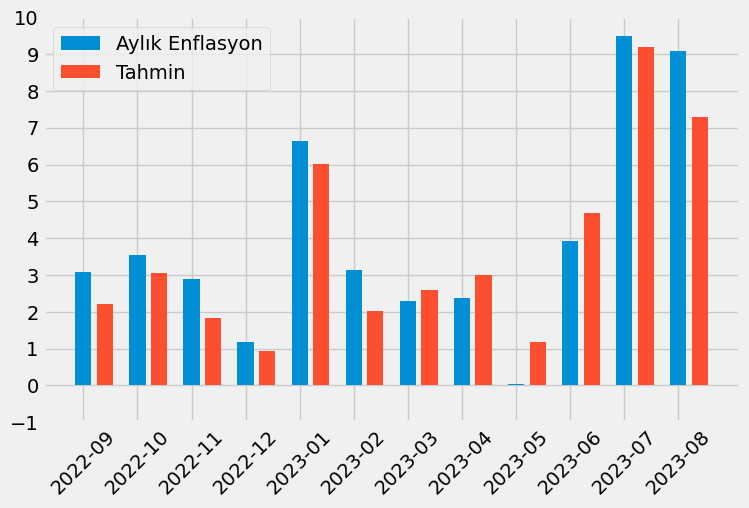

In [184]:
X_axis = np.arange(len(tahminler))
plt.figure(figsize=(8,5)) 
plt.bar(X_axis,tahminler["Aylık Enflasyon"],width=0.3,label="Aylık Enflasyon")
plt.bar(X_axis+0.4,tahminler["Kernel Regression"],width=0.3,label="Tahmin")
plt.xticks(X_axis,tahminler.index.strftime("%Y-%m"),rotation=45)
plt.yticks(np.arange(-1,11,1))
plt.legend()

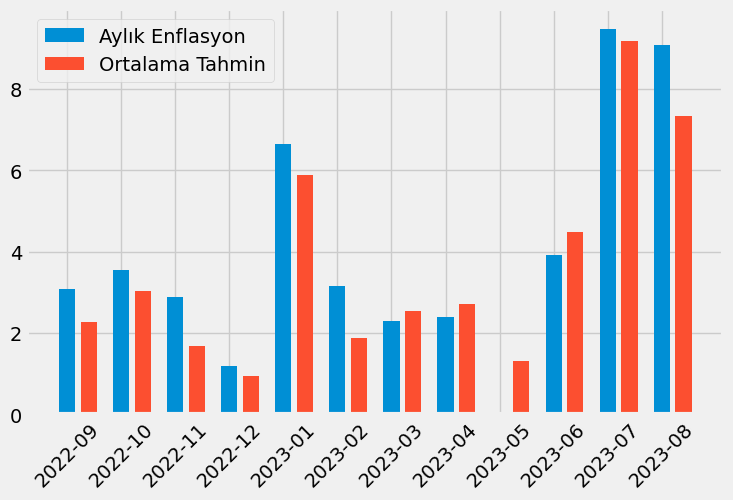

In [185]:
tahminler["Ortalama"]=tahminler.iloc[:,1:].mean(axis=1)
X_axis = np.arange(len(tahminler)) 
plt.figure(figsize=(8,5)) 
plt.bar(X_axis,tahminler["Aylık Enflasyon"],width=0.3,label="Aylık Enflasyon")
plt.bar(X_axis+0.4,tahminler["Ortalama"],width=0.3,label="Ortalama Tahmin")
plt.xticks(X_axis,tahminler.index.strftime("%Y-%m"),rotation=45)
plt.legend()

In [220]:
from pmdarima.arima import auto_arima

results = auto_arima(df6["USD/TL"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True,information_criterion='hqic')

Performing stepwise search to minimize hqic
 ARIMA(1,1,1)(0,1,1)[12]             : HQIC=197.376, Time=0.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : HQIC=287.460, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : HQIC=215.002, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : HQIC=194.146, Time=0.40 sec
 ARIMA(0,1,1)(0,1,0)[12]             : HQIC=246.884, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : HQIC=192.633, Time=0.34 sec
 ARIMA(0,1,1)(1,1,0)[12]             : HQIC=190.824, Time=0.22 sec
 ARIMA(0,1,1)(2,1,0)[12]             : HQIC=192.721, Time=0.59 sec
 ARIMA(0,1,1)(2,1,1)[12]             : HQIC=195.865, Time=2.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : HQIC=256.197, Time=0.12 sec
 ARIMA(1,1,1)(1,1,0)[12]             : HQIC=193.956, Time=0.28 sec
 ARIMA(0,1,2)(1,1,0)[12]             : HQIC=193.978, Time=0.33 sec
 ARIMA(1,1,2)(1,1,0)[12]             : HQIC=197.222, Time=0.64 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : HQIC=190.866, Time=0.41 sec

Best model:  ARIM

In [217]:
from statsmodels.tsa.arima.model import ARIMA

model = SARIMAX(df6["USD/TL"], order=(0,1,1),seasonal_order=(1,1,0,12))
model_fit = model.fit()
usdtahmin = model_fit.forecast(steps=15)
usdtahmin=pd.DataFrame(usdtahmin)
usdtahmin.columns=["USDTL"]
row=pd.DataFrame({"USDTL":df6.iloc[208:,0]},index=pd.date_range(start="2023-06-30",end="2023-11-29",freq="1M"))
usdtahmin=pd.concat([row,usdtahmin],axis=0)
usdtahmin

,USDTL
2023-06-30,23.106042
2023-07-31,26.470338
2023-08-31,26.999127
2023-09-30,26.989448
2023-10-31,27.752594
2023-11-30,28.773197
2023-12-31,30.775101
2024-01-31,30.810115
2024-02-29,30.899843
2024-03-31,31.573832


In [187]:
from statsmodels.tsa.ar_model import AutoReg
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import month_plot
import warnings


model = SARIMAX(df14["Brent"], order=(1, 1, 0), seasonal_order=(2, 1, 0, 12))

# Modeli eğitin
model_fit = model.fit(disp=0)

# Gelecekteki değerleri tahmin edin
n_forecast = 15# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
brenttahmin=pd.DataFrame(forecast_values)
brenttahmin.columns=["Brent"]
row=pd.DataFrame({"Brent":df14.iloc[209:213,0]},index=pd.date_range(start="2023-07-30",end="2023-11-29",freq="1M"))
brenttahmin=pd.concat([row,brenttahmin],axis=0)
brenttahmin

,Brent
2023-07-31,80.108095
2023-08-31,86.147727
2023-09-30,93.722381
2023-10-31,90.455455
2023-11-30,88.343082
2023-12-31,85.431383
2024-01-31,90.291657
2024-02-29,95.526542
2024-03-31,99.282546
2024-04-30,98.923810


In [151]:
from pmdarima.arima import auto_arima

results = auto_arima(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=895.423, Time=0.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=941.163, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=932.292, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=935.261, Time=0.09 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=2.13 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=924.839, Time=0.28 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=3.00 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(

In [188]:
model = SARIMAX(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"], order=(1,1,1),seasonal_order=(0,1,1,12))
model_fit = model.fit()
perakendetahmin = model_fit.forecast(steps=15)
perakendetahmin=pd.DataFrame(perakendetahmin)
perakendetahmin.columns=["Perakende"]
row=pd.DataFrame({"Perakende":perakende1.iloc[163,0]},index=pd.date_range(start="2023-08-30",end="2023-09-29",freq="1M"))
perakendetahmin=pd.concat([row,perakendetahmin],axis=0)
perakendetahmin

,Perakende
2023-08-31,184.748497
2023-09-30,177.058336
2023-10-31,178.125306
2023-11-30,179.371911
2023-12-31,179.533206
2024-01-31,180.650546
2024-02-29,180.458038
2024-03-31,182.407175
2024-04-30,180.242428
2024-05-31,181.499598


In [290]:
from pmdarima.arima import auto_arima

results = auto_arima(money["Para Arzi"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True,information_criterion='bic')

Performing stepwise search to minimize bic
 ARIMA(1,1,1)(0,1,1)[12]             : BIC=574.281, Time=0.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=631.641, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=584.212, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=597.650, Time=0.25 sec
 ARIMA(1,1,1)(0,1,0)[12]             : BIC=615.656, Time=0.08 sec
 ARIMA(1,1,1)(1,1,1)[12]             : BIC=578.550, Time=0.85 sec
 ARIMA(1,1,1)(0,1,2)[12]             : BIC=578.730, Time=2.24 sec
 ARIMA(1,1,1)(1,1,0)[12]             : BIC=579.137, Time=0.42 sec
 ARIMA(1,1,1)(1,1,2)[12]             : BIC=583.473, Time=3.11 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=585.506, Time=0.22 sec
 ARIMA(2,1,1)(0,1,1)[12]             : BIC=569.220, Time=1.30 sec
 ARIMA(2,1,1)(0,1,0)[12]             : BIC=616.271, Time=0.26 sec
 ARIMA(2,1,1)(1,1,1)[12]             : BIC=572.893, Time=1.45 sec
 ARIMA(2,1,1)(0,1,2)[12]             : BIC=573.208, Time=4.99 sec
 ARIMA(2,1,1)(1,1,0)[12]         

In [288]:
model = SARIMAX(money["Para Arzi"], order=(2,1,2),seasonal_order=(0,1,1,12))
model_fit = model.fit()


# Gelecekteki değerleri tahmin edin
n_forecast = 15 # 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
paraarzitahmin=pd.DataFrame(forecast_values)
paraarzitahmin.columns=["Para Arzi"]
paraarzitahmin=pd.concat([pd.DataFrame({"Para Arzi":money.iloc[209:213,0]},index=pd.date_range(start="2023-07-30",end="2023-11-29",freq="1M")),paraarzitahmin],axis=0)
paraarzitahmin

,Para Arzi
2023-07-31,113.228626
2023-08-31,119.111278
2023-09-30,122.425258
2023-10-31,124.203926
2023-11-30,127.977735
2023-12-31,132.909394
2024-01-31,136.363981
2024-02-29,140.211984
2024-03-31,144.843315
2024-04-30,149.654985


In [159]:
from pmdarima.arima import auto_arima

results = auto_arima(kfaiz["Kredi Faizi"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=769.010, Time=0.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=919.863, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=797.217, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=775.479, Time=0.26 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=849.638, Time=0.07 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=766.076, Time=0.35 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=798.950, Time=0.17 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=765.529, Time=1.87 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=779.877, Time=0.48 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=768.434, Time=2.48 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=761.442, Time=2.74 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=763.396, Time=1.78 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=768.238, Time=1.97 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=759.442, Time=1.76 sec
 ARIMA(1,1,0)(0,1,2)[12]         

In [190]:
model = SARIMAX(kfaiz["Kredi Faizi"], order=(1,1,0),seasonal_order=(1,1,2,12))
model_fit = model.fit()

# Gelecekteki değerleri tahmin edin
n_forecast = 15 # 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
kfaiztahmin=pd.DataFrame(forecast_values)
kfaiztahmin.columns=["Kredi Faizi"]
new_row=pd.DataFrame({"Kredi Faizi":kfaiz.iloc[210:213,0]},index=pd.date_range(start="2023-08-30",end="2023-11-29",freq="1M"))
kfaiztahmin=pd.concat([new_row,kfaiztahmin],axis=0)
kfaiztahmin



,Kredi Faizi
2023-08-31,45.765000
2023-09-30,56.298000
2023-10-31,59.615000
2023-11-30,60.028928
2023-12-31,60.791742
2024-01-31,60.930089
2024-02-29,59.273483
2024-03-31,58.345080
2024-04-30,58.297297
2024-05-31,58.923303


In [163]:
from pmdarima.arima import auto_arima

results = auto_arima(mfaiz["Mevduat Faizi"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=False, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=728.920, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=778.022, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=772.063, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=747.189, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=777.810, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=716.548, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=753.002, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=701.240, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=700.754, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=699.564, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=752.920, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=700.165, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=716.316, Time=0.08 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 1.104 seconds


In [191]:
model = ARIMA(mfaiz, order=(3, 1, 0))

# Modeli eğitin
model_fit = model.fit()

# Gelecekteki değerleri tahmin edin
n_forecast = 15 # 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
mfaiztahmin=pd.DataFrame(forecast_values)
mfaiztahmin.columns=["Mevduat Faizi"]
new_row=pd.DataFrame({"Mevduat Faizi":mfaiz.iloc[210:213,0]},index=pd.date_range(start="2023-08-30",end="2023-11-29",freq="1M"))
mfaiztahmin=pd.concat([new_row,mfaiztahmin],axis=0)
mfaiztahmin

,Mevduat Faizi
2023-08-31,29.412500
2023-09-30,41.656000
2023-10-31,45.055000
2023-11-30,37.157999
2023-12-31,39.567057
2024-01-31,47.061799
2024-02-29,43.823478
2024-03-31,39.754876
2024-04-30,44.556171
2024-05-31,46.780302


In [221]:
usdtahmin["brent"]=brenttahmin
usdtahmin=usdtahmin.dropna(axis=0)
degisim=pd.DataFrame((((usdtahmin["USDTL"]*usdtahmin["brent"]).pct_change(periods=1)+1).values)[1:],index=pd.date_range(start="2023-08-30",end="2025-02-27",freq="1M"))
degisim.columns=["Değişim"]
degisim=degisim.iloc[1:17]
degisim

,Değişim
2023-09-30,1.087536
2023-10-31,0.992433
2023-11-30,1.012564
2023-12-31,1.034323
2024-01-31,1.058093
2024-02-29,1.061059
2024-03-31,1.061989
2024-04-30,1.002429
2024-05-31,1.020249
2024-06-30,1.101929


In [222]:
motorintahmin=pd.DataFrame()
motorintahmin["Değişim"]=degisim
motorintahmin["Motorin"]=39.18
for i in range(1,16):
    motorintahmin.iloc[i,1]=motorintahmin.iloc[i,0]*motorintahmin.iloc[i-1,1]

del motorintahmin["Değişim"]
new_row=pd.DataFrame({"Motorin":motorin.iloc[247,0]},index=pd.date_range(start="2023-08-30",end="2023-09-29",freq="1M"))
motorintahmin=pd.concat([new_row,motorintahmin],axis=0)
motorintahmin

,Motorin
2023-08-31,37.370000
2023-09-30,39.180000
2023-10-31,38.883510
2023-11-30,39.372028
2023-12-31,40.723401
2024-01-31,43.089164
2024-02-29,45.720130
2024-03-31,48.554257
2024-04-30,48.672191
2024-05-31,49.657767


In [194]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,00,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2025-01-30",freq="1M"))
zamtahmin

,Zam
2023-08-31,0
2023-09-30,0
2023-10-31,0
2023-11-30,0
2023-12-31,0
2024-01-31,35
2024-02-29,0
2024-03-31,0
2024-04-30,0
2024-05-31,0


In [168]:
from pmdarima.arima import auto_arima

results = auto_arima(df3["Kredi"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=False, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=454.082, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=602.694, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=494.440, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=519.036, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=645.239, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=455.320, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=454.924, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=519.429, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=481.874, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=443.638, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=420.248, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=427.447, Time=0.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=419.858, Time=0.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=443.122, Time=0.32 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=421.0

In [195]:
model = ARIMA(df3["Kredi"], order=(3, 1, 3))

# Modeli eğitin
model_fit = model.fit()

# Gelecekteki değerleri tahmin edin
n_forecast = 16 # 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
kreditahmin=pd.DataFrame(forecast_values)
kreditahmin.columns=["Kredi"]
new_row=pd.DataFrame({"Kredi":[99.23,102.58,103.18]},index=pd.date_range(start="2023-08-30",end="2023-11-29",freq="1M"))
kreditahmin=pd.concat([new_row,kreditahmin],axis=0)
kreditahmin

,Kredi
2023-08-31,99.230000
2023-09-30,102.580000
2023-10-31,103.180000
2023-11-30,102.806054
2023-12-31,104.894294
2024-01-31,106.122436
2024-02-29,105.403210
2024-03-31,106.888562
2024-04-30,108.372611
2024-05-31,107.534670


In [178]:
from pmdarima.arima import auto_arima

results = auto_arima(borc["Borç"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=False, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6034.574, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6063.911, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6045.884, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6051.769, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6093.653, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6030.682, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6032.941, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6029.890, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6033.923, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6030.705, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6019.368, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6017.534, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6041.692, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6020.345, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept

In [196]:
model = ARIMA(borc["Borç"], order=(1, 1, 2), seasonal_order=(1, 0, 1, 12))

# Modeli eğitin
model_fit = model.fit()

# Gelecekteki değerleri tahmin edin
n_forecast = 16# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
borctahmin=pd.DataFrame(forecast_values)
borctahmin.columns=["Borç"]
new_row=pd.DataFrame({"Borç":2758965144},index=pd.date_range(start="2023-08-30",end="2023-09-29",freq="1M"))
borctahmin=pd.concat([new_row,borctahmin],axis=0)
borctahmin

,Borç
2023-08-31,2.758965e+09
2023-10-31,2.934016e+09
2023-11-30,3.005940e+09
2023-12-31,3.069800e+09
2024-01-31,3.128332e+09
2024-02-29,3.183702e+09
2024-03-31,3.236235e+09
2024-04-30,3.280363e+09
2024-05-31,3.321218e+09
2024-06-30,3.360512e+09


In [183]:

results = auto_arima(redk["REDK"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=742.361, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=687.459, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=734.067, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=675.182, Time=0.35 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=670.130, Time=1.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=668.135, Time=0.26 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=670.132, Time=1.29 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=668.217, Time=1.07 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=672.115, Time=1.22 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=674.834, Time=0.17 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=663.382, Time=0.44 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=in

In [197]:
model = SARIMAX(redk["REDK"], order=(2, 1, 0), seasonal_order=(1, 1, 1, 12))

# Modeli eğitin
model_fit = model.fit()

# Gelecekteki değerleri tahmin edin
n_forecast = 16# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
redktahmin=pd.DataFrame(forecast_values)
redktahmin.columns=["REDK"]
new_row=pd.DataFrame({"REDK":[84.81,88.29]},index=pd.date_range(start="2023-08-30",end="2023-10-29",freq="1M"))
redktahmin=pd.concat([new_row,redktahmin],axis=0)
redktahmin

,REDK
2023-08-31,84.810000
2023-09-30,88.290000
2023-10-31,87.997770
2023-11-30,87.214358
2023-12-31,85.531698
2024-01-31,86.984450
2024-02-29,88.983093
2024-03-31,88.439166
2024-04-30,88.321581
2024-05-31,88.268137


In [185]:
results = auto_arima(redkt["REDKT"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=756.907, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=700.764, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=744.289, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=682.174, Time=0.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=677.154, Time=1.44 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=675.181, Time=0.40 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=677.177, Time=1.55 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=675.200, Time=1.28 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=3.32 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=686.703, Time=0.25 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=665.544, Time=0.51 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, T

In [198]:
model = SARIMAX(redkt["REDKT"], order=(2, 1, 0), seasonal_order=(1, 1, 1, 12))

# Modeli eğitin
model_fit = model.fit(disp=0)

# Gelecekteki değerleri tahmin edin
n_forecast = 16# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
redkttahmin=pd.DataFrame(forecast_values)
redkttahmin.columns=["REDKT"]
new_row=pd.DataFrame({"REDKT":[52.42,55.52]},index=pd.date_range(start="2023-08-30",end="2023-10-29",freq="1M"))
redkttahmin=pd.concat([new_row,redkttahmin],axis=0)
redkttahmin

,REDKT
2023-08-31,52.420000
2023-09-30,55.520000
2023-10-31,55.807175
2023-11-30,54.435473
2023-12-31,52.551396
2024-01-31,53.485479
2024-02-29,54.657562
2024-03-31,53.617185
2024-04-30,53.457812
2024-05-31,52.151740


In [189]:
from pmdarima.arima import auto_arima

results = auto_arima(m3["M3 Para Arzi"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=False, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=657.481, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=771.983, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=710.015, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=738.849, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=801.311, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=659.228, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=659.260, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=711.705, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=678.724, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=660.871, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=656.371, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=758.125, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=717.438, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=658.121, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=658.1

In [199]:
model = ARIMA(m3["M3 Para Arzi"], order=(1, 1, 1))

# Modeli eğitin
model_fit = model.fit()

# Gelecekteki değerleri tahmin edin
n_forecast = 15# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
m3tahmin=pd.DataFrame(forecast_values)
m3tahmin.columns=["M3 Para Arzi"]
new_row=pd.DataFrame({"M3 Para Arzi":[123.43,126.66,127.9]},index=pd.date_range(start="2023-08-30",end="2023-11-29",freq="1M"))
m3tahmin=pd.concat([new_row,m3tahmin],axis=0)
m3tahmin

,M3 Para Arzi
2023-08-31,123.430000
2023-09-30,126.660000
2023-10-31,127.900000
2023-11-30,131.926439
2023-12-31,135.931746
2024-01-31,139.925377
2024-02-29,143.907366
2024-03-31,147.877746
2024-04-30,151.836552
2024-05-31,155.783817


In [309]:
from pmdarima.arima import auto_arima

results = auto_arima(issizlik["İşsizlik"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True,information_criterion='hqic')

Performing stepwise search to minimize hqic
 ARIMA(1,1,1)(0,1,1)[12]             : HQIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : HQIC=192.255, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : HQIC=157.576, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : HQIC=inf, Time=0.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : HQIC=195.250, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : HQIC=143.605, Time=0.64 sec
 ARIMA(1,1,0)(2,1,1)[12]             : HQIC=inf, Time=2.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : HQIC=134.496, Time=0.43 sec
 ARIMA(1,1,0)(0,1,1)[12]             : HQIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(1,1,2)[12]             : HQIC=inf, Time=1.73 sec
 ARIMA(1,1,0)(0,1,2)[12]             : HQIC=134.612, Time=1.12 sec
 ARIMA(1,1,0)(2,1,2)[12]             : HQIC=140.630, Time=1.49 sec
 ARIMA(0,1,0)(1,1,1)[12]             : HQIC=inf, Time=0.29 sec
 ARIMA(2,1,0)(1,1,1)[12]             : HQIC=137.129, Time=0.43 sec
 ARIMA(1,1,1)(1,1,1)[12]             : HQI

In [308]:
model = SARIMAX(issizlik["İşsizlik"], order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))

# Modeli eğitin
model_fit = model.fit(disp=0)

# Gelecekteki değerleri tahmin edin
n_forecast = 17# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
issizliktahmin=pd.DataFrame(forecast_values)
issizliktahmin.columns=["İşsizlik"]
new_row=pd.DataFrame({"İşsizlik":[9.2]},index=pd.date_range(start="2023-08-30",end="2023-09-29",freq="1M"))
issizliktahmin=pd.concat([new_row,issizliktahmin],axis=0)
issizliktahmin

,İşsizlik
2023-08-31,9.200000
2023-09-30,9.128270
2023-10-31,9.096536
2023-11-30,9.149132
2023-12-31,9.186304
2024-01-31,9.256840
2024-02-29,9.307002
2024-03-31,9.341871
2024-04-30,9.415606
2024-05-31,9.422929


In [192]:
results = auto_arima(enf_belirsizlik["Enflasyon Belirsizliği"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=258.120, Time=0.51 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=286.029, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=264.306, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=256.519, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=287.109, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=258.312, Time=0.30 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=258.241, Time=0.92 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=264.386, Time=0.15 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=259.240, Time=1.20 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=255.415, Time=0.14 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=257.228, Time=0.25 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=257.180, Time=0.55 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=262.706, Time=0.09 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=258.445, Time=0.81 sec
 ARIMA(1,1,0)(0,1,1)[12]         

In [201]:
model = SARIMAX(enf_belirsizlik["Enflasyon Belirsizliği"], order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))

# Modeli eğitin
model_fit = model.fit(disp=0)

# Gelecekteki değerleri tahmin edin
n_forecast = 17# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
enfbelirsizliktahmin=pd.DataFrame(forecast_values)
enfbelirsizliktahmin.columns=["Enflasyon Belirsizliği"]
new_row=pd.DataFrame({"Enflasyon Belirsizliği":[6.81,7.3,5.57]},index=pd.date_range(start="2023-08-30",end="2023-11-29",freq="1M"))
enfbelirsizliktahmin=pd.concat([new_row,enfbelirsizliktahmin],axis=0)
enfbelirsizliktahmin

,Enflasyon Belirsizliği
2023-08-31,6.810000
2023-09-30,7.300000
2023-10-31,5.570000
2023-11-30,5.805533
2023-12-31,6.972540
2024-01-31,7.940352
2024-02-29,6.897245
2024-03-31,7.419293
2024-04-30,7.356433
2024-05-31,7.693614


In [196]:
results = auto_arima(sanayi["Sanayi"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1371.634, Time=0.42 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1475.202, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1399.607, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1375.521, Time=0.31 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1408.853, Time=0.11 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1362.964, Time=0.65 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1397.669, Time=0.21 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1360.308, Time=1.83 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1388.361, Time=0.58 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=inf, Time=2.61 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1363.208, Time=2.16 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1358.341, Time=1.84 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1390.492, Time=0.59 sec
 ARIMA(0,1,1)(2,1,2)[12]     

In [202]:
model = SARIMAX(sanayi["Sanayi"], order=(0, 1, 1), seasonal_order=(2, 1, 1, 12))

# Modeli eğitin
model_fit = model.fit(disp=0)

# Gelecekteki değerleri tahmin edin
n_forecast = 17# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
sanayitahmin=pd.DataFrame(forecast_values)
sanayitahmin.columns=["Sanayi"]
new_row=pd.DataFrame({"Sanayi":[149.23]},index=pd.date_range(start="2023-08-30",end="2023-09-29",freq="1M"))
sanayitahmin=pd.concat([new_row,sanayitahmin],axis=0)
sanayitahmin

,Sanayi
2023-08-31,149.230000
2023-09-30,150.367375
2023-10-31,154.168262
2023-11-30,153.574592
2023-12-31,162.950974
2024-01-31,141.743172
2024-02-29,133.967854
2024-03-31,154.022459
2024-04-30,138.777976
2024-05-31,151.289525


In [223]:

model = SARIMAX(df6["USD/TL"], order=(0,1,1),seasonal_order=(1,1,0,12))
model_fit = model.fit()
usdtahmin = model_fit.forecast(steps=15)
usdtahmin=pd.DataFrame(usdtahmin)
usdtahmin.columns=["USDTL"]
row=pd.DataFrame({"USDTL":df6.iloc[208:,0]},index=pd.date_range(start="2023-06-30",end="2023-11-29",freq="1M"))
usdtahmin=pd.concat([row,usdtahmin],axis=0)
usdtahmin

,USDTL
2023-06-30,23.106042
2023-07-31,26.470338
2023-08-31,26.999127
2023-09-30,26.989448
2023-10-31,27.752594
2023-11-30,28.773197
2023-12-31,30.775101
2024-01-31,30.810115
2024-02-29,30.899843
2024-03-31,31.573832


In [291]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin["USDTL"].rolling(3).mean(),paraarzitahmin["Para Arzi"].shift(1),motorintahmin["Motorin"],enfbelirsizliktahmin,perakendetahmin,sanayitahmin,kreditahmin,redktahmin,redkttahmin,m3tahmin,borctahmin],axis=1)
tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf=tahmindf.dropna(axis=0)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Kredi Faizi"]=kfaiztahmin["Kredi Faizi"]
tahmindf["Mevduat Faizi"]=mfaiztahmin["Mevduat Faizi"]
tahmindf["İşsizlik"]=issizliktahmin



tahmindf["Şok"]=0

tahmindf=tahmindf[['USDTL', 'Motorin', 'Perakende', 'Kredi Faizi', 'Zam', 'Sanayi',
       'Enflasyon Belirsizliği', 'Para Arzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','REDKT','Şok','M3 Para Arzi','İşsizlik']]

tahmindf.columns=data.columns[:16]


tahmindf=tahmindf.dropna(axis=0)
tahmindf

,USDTL,Motorin,Perakende Satış,Kredi Faizi,Zam,Sanayi,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,Şok,M3,İşsizlik
2023-09-30,5.071342,4.843457,-4.162503,56.298000,0.0,0.762162,7.300000,5.195375,0.000000,3.375995,41.656000,4.103290,5.913773,0,2.616868,9.128270
2023-10-31,1.593678,-0.756737,0.602610,59.615000,0.0,2.527734,5.570000,2.782256,6.344814,0.584909,45.055000,-0.330989,0.517247,0,0.978999,9.096536
2023-11-30,2.170350,1.256361,0.699847,60.028928,0.0,-0.385079,5.805533,1.452860,2.451355,-0.362421,37.157999,-0.890264,-2.457931,0,3.148115,9.149132
2023-12-31,4.532889,3.432319,0.089922,60.791742,0.0,6.105425,6.972540,3.038397,2.124462,2.031242,39.567057,-1.929338,-3.461120,0,3.036015,9.186304
2024-01-31,3.502279,5.809344,0.622358,60.930089,35.0,-13.014836,7.940352,3.853529,1.906729,1.170837,47.061799,1.698496,1.777465,0,2.937968,9.256840
2024-02-29,2.353568,6.105865,-0.106563,59.273483,0.0,-5.485497,6.897245,2.599204,1.769946,-0.677732,43.823478,2.297701,2.191405,0,2.845794,9.307002
2024-03-31,0.863632,6.198860,1.080105,58.345080,0.0,14.969714,7.419293,2.821862,1.650048,1.409209,39.754876,-0.611270,-1.903447,0,2.758983,9.341871
2024-04-30,1.023954,0.242890,-1.186766,58.297297,0.0,-9.897572,7.356433,3.303092,1.363583,1.388408,44.556171,-0.132956,-0.297242,0,2.677080,9.415606
2024-05-31,1.715941,2.024927,0.697488,58.923303,0.0,9.015515,7.693614,3.321983,1.245428,-0.773203,46.780302,-0.060510,-2.443183,0,2.599680,9.422929
2024-06-30,3.110502,10.192857,2.193445,59.224441,0.0,-4.013370,8.169423,2.618990,1.183120,0.799446,42.447125,-0.374041,-1.066576,0,2.526423,9.100212


In [292]:
features=['Motorin', 'Perakende Satış', 'Kredi Faizi', 'Zam', 'Enflasyon Belirsizliği', 'Kredi', 'REDKT', 'Şok']


X = data[features]
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=100000, tol=1e-6))
reg.fit(X, y)

tüfe = 1614  # İlk değeri 1691 ile başlatıyoruz
tüfetahmin1 = []
sgdtahmin=reg.predict(tahmindf[features])
sgdtahmin=1+(sgdtahmin/100)
for elem in sgdtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin1.append(tüfe)
tüfetahmin1=pd.DataFrame(tüfetahmin1)
tüfetahmin1=tüfetahmin1.set_index(pd.date_range(start="2023-09-30",end="2025-01-30",freq="1M"))
tüfetahmin1.columns=["SGD Regressor"]

tüfetahmin1

,SGD Regressor
2023-09-30,1713.605155
2023-10-31,1767.903610
2023-11-30,1812.202656
2023-12-31,1884.500290
2024-01-31,1993.467520
2024-02-29,2066.032344
2024-03-31,2149.166515
2024-04-30,2227.742026
2024-05-31,2280.851772
2024-06-30,2379.784601


In [312]:
features=tahmindf.columns

X = data[features]
model=LinearRegression()
model.fit(X,y)


tüfe = 1614  # İlk değeri 1691 ile başlatıyoruz
tüfetahmin3 = []    
lineartahmin=model.predict(tahmindf[features])
lineartahmin=1+(lineartahmin/100)
for elem in lineartahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin3.append(tüfe)
tüfetahmin3=pd.DataFrame(tüfetahmin3)
tüfetahmin3=tüfetahmin3.set_index(pd.date_range(start="2023-09-30",end="2025-01-30",freq="1M"))
tüfetahmin3.columns=["Linear Regression"]

tüfetahmin3

,Linear Regression
2023-09-30,1714.913579
2023-10-31,1766.691867
2023-11-30,1810.047724
2023-12-31,1880.426033
2024-01-31,1985.829002
2024-02-29,2055.843406
2024-03-31,2123.352702
2024-04-30,2187.289006
2024-05-31,2228.086711
2024-06-30,2314.957445


In [294]:
features=tahmindf.columns

X = data[features]
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X,y)


tüfe = 1614  # İlk değeri 1691 ile başlatıyoruz
tüfetahmin5 = []
lassotahmin=reg.predict(tahmindf[features])
lassotahmin=1+(lassotahmin/100)
for elem in lassotahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin5.append(tüfe)
tüfetahmin5=pd.DataFrame(tüfetahmin5)
tüfetahmin5=tüfetahmin5.set_index(pd.date_range(start="2023-09-30",end="2025-01-30",freq="1M"))
tüfetahmin5.columns=["Lasso Regression"]

tüfetahmin5

,Lasso Regression
2023-09-30,1703.270421
2023-10-31,1750.214908
2023-11-30,1795.289278
2023-12-31,1863.409565
2024-01-31,1968.844703
2024-02-29,2040.164855
2024-03-31,2108.397613
2024-04-30,2170.289828
2024-05-31,2223.500078
2024-06-30,2312.586169


In [295]:
from itertools import combinations
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
import tensorflow as tf
from keras.layers import Dense

features=tahmindf.columns

X = data[features]
model = tf.keras.models.Sequential()
model.add(Dense(units=32,input_dim=X.shape[1],activation="linear"))
model.add(Dense(32,activation="linear"))
model.add(Dense(32,activation="linear"))
model.add(Dense(1,activation="linear"))
model.compile(optimizer=Adam(learning_rate=0.01),loss="mae",metrics=["mae"])
cıktı=model.fit(X,y,epochs=100,verbose=0)


 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin4 =[]
dnntahmin=model.predict(tahmindf[features])
dnntahmin=1+(dnntahmin/100)
tüfe = [1614]

tufe_degerleri = tüfe
for oran in dnntahmin:
    tufe_degerleri.append(tufe_degerleri[-1] * oran)

# DataFrame oluştur
tüfetahmin4 = pd.DataFrame({'DNN': tufe_degerleri},index=pd.date_range(start="2023-08-30",end="2025-01-30",freq="1M"))

tüfetahmin4["DNN"]=tüfetahmin4["DNN"].astype(float)
tüfetahmin4=tüfetahmin4.tail(16)
tüfetahmin4

1/1 [==============================] - 0s 61ms/step


,DNN
2023-09-30,1712.697510
2023-10-31,1771.764771
2023-11-30,1821.939209
2023-12-31,1896.396362
2024-01-31,2027.774292
2024-02-29,2109.530762
2024-03-31,2189.950684
2024-04-30,2270.725830
2024-05-31,2336.476562
2024-06-30,2441.025391


In [296]:

features=tahmindf.columns
X = data[features]
reg = linear_model.Lars(random_state=0)
reg.fit(X,y)


tüfe = 1614  # İlk değeri 1691 ile başlatıyoruz
tüfetahmin6 = []
larstahmin=reg.predict(tahmindf[features])
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin6.append(tüfe)
tüfetahmin6=pd.DataFrame(tüfetahmin6)
tüfetahmin6=tüfetahmin6.set_index(pd.date_range(start="2023-09-30",end="2025-01-30",freq="1M"))
tüfetahmin6.columns=["Lars Regression"]

tüfetahmin6

,Lars Regression
2023-09-30,1714.913579
2023-10-31,1766.691867
2023-11-30,1810.047724
2023-12-31,1880.426033
2024-01-31,1985.829002
2024-02-29,2055.843406
2024-03-31,2123.352702
2024-04-30,2187.289006
2024-05-31,2228.086711
2024-06-30,2314.957445


In [297]:
features=tahmindf.columns
X = data[features]
krr = KernelRidge(alpha=1.0)
krr.fit(X, y)


tüfe = 1614  # İlk değeri 1691 ile başlatıyoruz
tüfetahmin7 = []
krrtahmin=krr.predict(tahmindf[features])
krrtahmin=1+(krrtahmin/100)
for elem in krrtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin7.append(tüfe)
tüfetahmin7=pd.DataFrame(tüfetahmin7)
tüfetahmin7=tüfetahmin7.set_index(pd.date_range(start="2023-09-30",end="2025-01-30",freq="1M"))
tüfetahmin7.columns=["Kernel Regression"]

tüfetahmin7

,Kernel Regression
2023-09-30,1708.927390
2023-10-31,1758.681580
2023-11-30,1799.531183
2023-12-31,1865.084609
2024-01-31,1967.011870
2024-02-29,2035.198234
2024-03-31,2098.266856
2024-04-30,2158.084762
2024-05-31,2199.270988
2024-06-30,2282.783310


In [298]:



features=tahmindf.columns
X = data[features]
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(X, y) 


tüfe = 1614  # İlk değeri 1691 ile başlatıyoruz
tüfetahmin8 = []
gaustahmin=gpr.predict(tahmindf[features])
gaustahmin=1+(gaustahmin/100)
for elem in gaustahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin8.append(tüfe)
tüfetahmin8=pd.DataFrame(tüfetahmin8)
tüfetahmin8=tüfetahmin8.set_index(pd.date_range(start="2023-09-30",end="2025-01-30",freq="1M"))
tüfetahmin8.columns=["Gaussian Regression"]

tüfetahmin8
        

,Gaussian Regression
2023-09-30,1708.986116
2023-10-31,1758.778201
2023-11-30,1799.626529
2023-12-31,1865.200550
2024-01-31,1967.127470
2024-02-29,2035.310632
2024-03-31,2098.391454
2024-04-30,2158.237593
2024-05-31,2199.384516
2024-06-30,2282.894579


In [299]:
features=tahmindf.columns
X = data[features]
reg = linear_model.BayesianRidge()
reg.fit(X, y)


tüfe = 1614  # İlk değeri 1691 ile başlatıyoruz
tüfetahmin9 = []
bayestahmin=reg.predict(tahmindf[features])
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin9.append(tüfe)
tüfetahmin9=pd.DataFrame(tüfetahmin9)
tüfetahmin9=tüfetahmin9.set_index(pd.date_range(start="2023-09-30",end="2025-01-30",freq="1M"))
tüfetahmin9.columns=["Bayessian Regression"]

tüfetahmin9

,Bayessian Regression
2023-09-30,1698.475592
2023-10-31,1746.544961
2023-11-30,1791.357589
2023-12-31,1856.964490
2024-01-31,1960.541116
2024-02-29,2031.649259
2024-03-31,2097.817352
2024-04-30,2157.805850
2024-05-31,2211.652328
2024-06-30,2299.335815


In [300]:



features=tahmindf.columns
X = data[features]
model = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 50, seed = 123)
model.fit(X,y)


tüfe = 1614  # İlk değeri 1691 ile başlatıyoruz
tüfetahmin10 = []
xgbtahmin=model.predict(tahmindf[features])
xgbtahmin=1+(xgbtahmin/100)
for elem in xgbtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin10.append(tüfe)
tüfetahmin10=pd.DataFrame(tüfetahmin10)
tüfetahmin10=tüfetahmin10.set_index(pd.date_range(start="2023-09-30",end="2025-01-30",freq="1M"))
tüfetahmin10.columns=["XGBoost"]

tüfetahmin10

,XGBoost
2023-09-30,1680.861473
2023-10-31,1720.388309
2023-11-30,1764.861677
2023-12-31,1811.818785
2024-01-31,1870.853921
2024-02-29,1930.300077
2024-03-31,1990.592731
2024-04-30,2040.695650
2024-05-31,2093.267973
2024-06-30,2163.886192


In [313]:
tüfetahmin=pd.DataFrame()
tüfetahmin["SGD Regressor"]=tüfetahmin1["SGD Regressor"]
tüfetahmin["Linear Regression"]=tüfetahmin3["Linear Regression"]
tüfetahmin["DNN"]=tüfetahmin4["DNN"]
tüfetahmin["Lasso Regression"]=tüfetahmin5["Lasso Regression"]
tüfetahmin["Lars Regression"]=tüfetahmin6["Lars Regression"]
tüfetahmin["Kernel Regression"]=tüfetahmin7["Kernel Regression"]
tüfetahmin["Gaussian Regression"]=tüfetahmin8["Gaussian Regression"]
tüfetahmin["Bayessian Regression"]=tüfetahmin9["Bayessian Regression"]
tüfetahmin["XGBoost"]=tüfetahmin10["XGBoost"]
tüfetahmin

,SGD Regressor,Linear Regression,DNN,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,XGBoost
2023-09-30,1713.605155,1714.913579,1712.697510,1703.270421,1714.913579,1708.927390,1708.986116,1698.475592,1680.861473
2023-10-31,1767.903610,1766.691867,1771.764771,1750.214908,1766.691867,1758.681580,1758.778201,1746.544961,1720.388309
2023-11-30,1812.202656,1810.047724,1821.939209,1795.289278,1810.047724,1799.531183,1799.626529,1791.357589,1764.861677
2023-12-31,1884.500290,1880.426033,1896.396362,1863.409565,1880.426033,1865.084609,1865.200550,1856.964490,1811.818785
2024-01-31,1993.467520,1985.829002,2027.774292,1968.844703,1985.829002,1967.011870,1967.127470,1960.541116,1870.853921
2024-02-29,2066.032344,2055.843406,2109.530762,2040.164855,2055.843406,2035.198234,2035.310632,2031.649259,1930.300077
2024-03-31,2149.166515,2123.352702,2189.950684,2108.397613,2123.352702,2098.266856,2098.391454,2097.817352,1990.592731
2024-04-30,2227.742026,2187.289006,2270.725830,2170.289828,2187.289006,2158.084762,2158.237593,2157.805850,2040.695650
2024-05-31,2280.851772,2228.086711,2336.476562,2223.500078,2228.086711,2199.270988,2199.384516,2211.652328,2093.267973
2024-06-30,2379.784601,2314.957445,2441.025391,2312.586169,2314.957445,2282.783310,2282.894579,2299.335815,2163.886192


In [314]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)





dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[1:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[1:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[1:,3]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[3]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[1:,4]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[4]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[1:,5]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[5]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[1:,6]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[6]]

dfas8=pd.DataFrame()
dfas8=pd.concat([df["CPI"],tüfetahmin.iloc[1:,7]],axis=0)
dfas8=pd.DataFrame(dfas8)
dfas8.columns=[tüfetahmin.columns[7]]

dfas9=pd.DataFrame()
dfas9=pd.concat([df["CPI"],tüfetahmin.iloc[1:,8]],axis=0)
dfas9=pd.DataFrame(dfas9)
dfas9.columns=[tüfetahmin.columns[8]]




dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6,dfas7,dfas8,dfas9],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








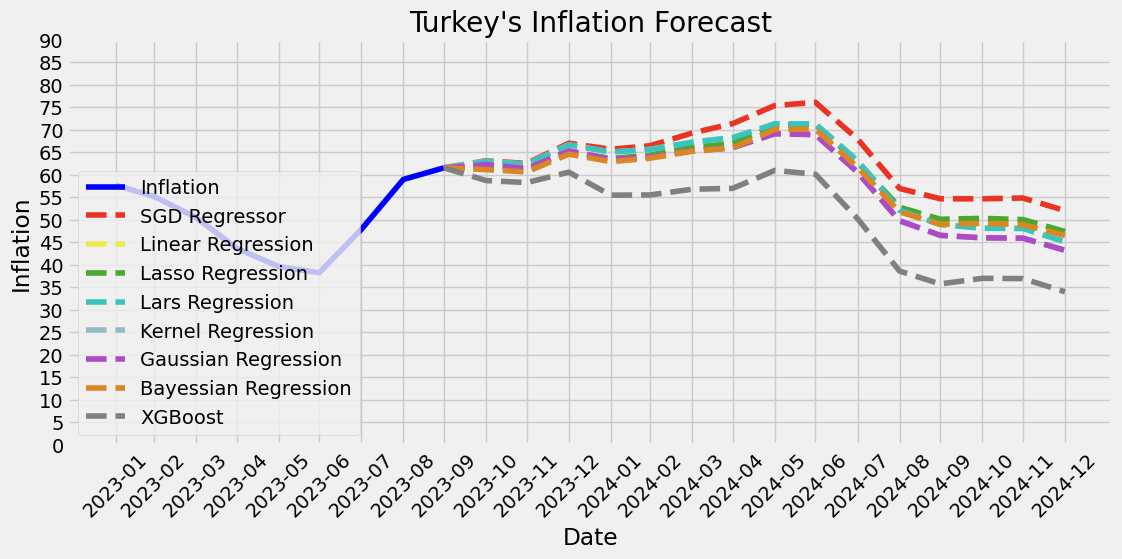

In [315]:








# Grafik çizdirelim
plt.figure(figsize=(12, 5))
plt.plot(df.iloc[191:200,1], label='Inflation', color='blue')
plt.plot(dfas.iloc[199:,0],'--',label=dfas.columns[0], color='#EB3324')
plt.plot(dfas.iloc[199:,1],'--',label=dfas.columns[1], color='#EDEB4F')
plt.plot(dfas.iloc[199:,2],'--',label=dfas.columns[2], color='#4AA82E')
plt.plot(dfas.iloc[199:,3],'--',label=dfas.columns[3], color='#39C4C2')
plt.plot(dfas.iloc[199:,4],'--',label=dfas.columns[4],color='#92BCC4')
plt.plot(dfas.iloc[199:,5],'--',label=dfas.columns[5],color='#AD4AC4')
plt.plot(dfas.iloc[199:,6],'--',label=dfas.columns[6],color='#DB8622')
plt.plot(dfas.iloc[199:,7],'--',label=dfas.columns[7],color='#808080')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.xticks(dfas.iloc[191:].index, dfas.iloc[191:].index.strftime('%Y-%m'), rotation=45)
y_max = 100
y_min = 10
y_interval = 0.5
y_ticks = [0]
while y_ticks[-1] < 90:
    y_ticks.append(y_ticks[-1] + 5)









# Y ekseni etiketlerini ayarlama
plt.yticks(y_ticks)
plt.title("Turkey's Inflation Forecast")
plt.legend(loc=3)
plt.grid(True)
plt.show()


In [316]:
eylül_tahmin=((tüfetahmin.iloc[0,:]/1614)-1)*100
eylül_tahmin

SGD Regressor           6.171323
Linear Regression       6.252390
DNN                     6.115087
Lasso Regression        5.531005
Lars Regression         6.252390
Kernel Regression       5.881499
Gaussian Regression     5.885137
Bayessian Regression    5.233928
XGBoost                 4.142594
Name: 2023-09-30 00:00:00, dtype: float64

In [317]:
aylıktahmin=tüfetahmin.pct_change(periods=1)*100
aylıktahmin=aylıktahmin.dropna(axis=0)
row=pd.DataFrame({eylül_tahmin.index[0]:eylül_tahmin[0],eylül_tahmin.index[1]:eylül_tahmin[1],eylül_tahmin.index[2]:eylül_tahmin[2],eylül_tahmin.index[3]:eylül_tahmin[3],eylül_tahmin.index[4]:eylül_tahmin[4],eylül_tahmin.index[5]:eylül_tahmin[5],eylül_tahmin.index[6]:eylül_tahmin[6],eylül_tahmin.index[7]:eylül_tahmin[7],eylül_tahmin.index[8]:eylül_tahmin[8]},index=pd.date_range(start="2023-09-30",end="2023-10-29",freq="1M"))
aylıktahmin=pd.concat([row,aylıktahmin],axis=0)
aylıktahmin["Ortalama"]=aylıktahmin.mean(axis=1)
aylıktahmin["Medyan"]=aylıktahmin.median(axis=1)
aylıktahmin

,SGD Regressor,Linear Regression,DNN,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,XGBoost,Ortalama,Medyan
2023-09-30,6.171323,6.252390,6.115087,5.531005,6.252390,5.881499,5.885137,5.233928,4.142594,5.718373,5.883318
2023-10-31,3.168668,3.019294,3.448785,2.756138,3.019294,2.911428,2.913545,2.830148,2.351582,2.935431,2.924488
2023-11-30,2.505739,2.454070,2.831891,2.575362,2.454070,2.322740,2.322540,2.565787,2.585077,2.513031,2.509385
2023-12-31,3.989490,3.888202,4.086698,3.794391,3.888202,3.642806,3.643757,3.662412,2.660668,3.695181,3.744786
2024-01-31,5.782288,5.605271,6.927767,5.658184,5.605271,5.465021,5.464663,5.577739,3.258336,5.482726,5.591505
2024-02-29,3.640131,3.525702,4.031833,3.622437,3.525702,3.466495,3.466128,3.626965,3.177488,3.564764,3.545233
2024-03-31,4.023856,3.283776,3.812218,3.344473,3.283776,3.098893,3.099322,3.256866,3.123486,3.369630,3.283776
2024-04-30,3.656092,3.011101,3.688446,2.935510,3.011101,2.850825,2.852001,2.859567,2.516985,3.042403,2.973306
2024-05-31,2.384017,1.865218,2.895582,2.451758,1.865218,1.908462,1.906506,2.495427,2.576196,2.260932,2.322474
2024-06-30,4.337539,3.898894,4.474636,4.006570,3.898894,3.797273,3.796974,3.964614,3.373587,3.949887,3.924390


In [318]:
yıllıktahmin=pd.DataFrame(dfas)
yıllıktahmin["Ortalama"]=dfas.mean(axis=1)
yıllıktahmin["Medyan"]=dfas.median(axis=1)
yıllıktahmin.tail(15)

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,XGBoost,Ortalama,Medyan
2023-10-31,63.090739,62.978955,61.458940,62.978955,62.239998,62.248912,61.120384,58.707409,61.853036,62.244455
2023-11-30,62.491496,62.298273,60.974955,62.298273,61.355306,61.363855,60.622419,58.246658,61.206404,61.359580
2023-12-31,66.999007,66.637958,65.130007,66.637958,65.278445,65.288719,64.558863,60.558180,65.136142,65.283582
2024-01-31,65.641932,65.007229,63.595964,65.007229,63.443669,63.453275,62.905999,55.453678,63.063622,63.524619
2024-02-29,66.436995,65.616186,64.353142,65.616186,63.953037,63.962092,63.667136,55.502572,63.638418,64.157617
2024-03-31,69.259029,67.226045,66.048247,67.226045,65.250392,65.260205,65.214991,56.770445,65.281925,65.654226
2024-04-30,71.359499,68.247824,66.940235,68.247824,66.001412,66.013168,65.979958,56.971759,66.220210,66.476702
2024-05-31,75.369197,71.312218,70.959563,71.312218,69.096647,69.105376,70.048618,60.946330,69.768771,70.504091
2024-06-30,76.072966,71.276604,71.101160,71.276604,68.896138,68.904370,70.120807,60.099305,69.718494,70.610984
2024-07-31,67.929752,63.121844,62.832687,63.121844,60.535171,60.544319,61.673090,50.245770,61.250560,62.252889


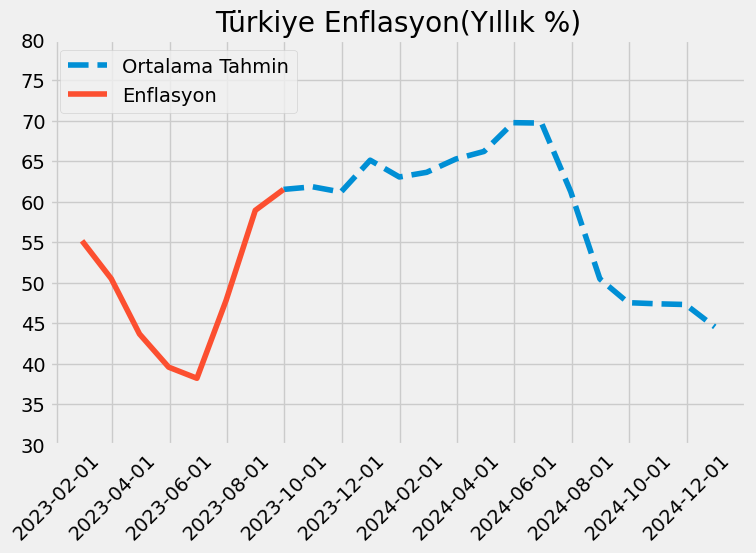

In [319]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
plt.plot(yıllıktahmin["Ortalama"].tail(16),'--',label="Ortalama Tahmin")
plt.plot(yıllıktahmin["Ortalama"].iloc[-23:-15],label="Enflasyon")
plt.xticks(yıllıktahmin.tail(23).index.strftime("%Y-%m")[::2],rotation=45)
plt.yticks(np.arange(30,85,5))
plt.title("Türkiye Enflasyon(Yıllık %)")
plt.legend(loc=2)
plt.show()